In [1]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Activation, Flatten
from keras.layers import MaxPool2D
from keras.optimizers import Adam , RMSprop, SGD
from keras.callbacks import EarlyStopping
import pickle 

: 

: 

In [27]:
path = 'DatasetsTestBatikNoDuplicate5k'
testRatio = 0.2
validationRatio = 0.2
imageDimension =(32,32,3)
batchSizeVal=32
epochsVal=15
# stepsPerEpochVal=757


In [5]:
images=[]
classNumber =[]

myList = os.listdir(path)
print("Total Number of Classes Detected" , " : " ,  len(myList))
NumberOfClasses =len(myList)

print("Importing Classes ....")
for x in range(0,NumberOfClasses):

    myPicList = os.listdir(path+"/"+str(x))

    for y in myPicList:
        currentImage = cv2.imread(path+"/"+str(x)+"/"+y)
        currentImage = cv2.resize(currentImage, (imageDimension[0],imageDimension[1]) )
        images.append(currentImage)
        classNumber.append(x)
    print(x,end = " " )  
print("")
print(len(classNumber))

images = np.array(images)
classNumber = np.array(classNumber)

Total Number of Classes Detected  :  5
Importing Classes ....
0 1 2 3 4 
24680


In [6]:
print("images : " + str(images.shape))
print("classNumber: "+ str(classNumber.shape))

images : (24680, 128, 128, 3)
classNumber: (24680,)


In [7]:
### Split Data
X_train,X_test,Y_train,Y_test = train_test_split(images,classNumber,test_size = testRatio)
X_train,X_validation,Y_train,Y_validation= train_test_split(X_train,Y_train,test_size = validationRatio)

In [8]:
print("x_train.shape = " + str(X_train.shape))
print("x_test.shape = " +str(X_test.shape))
print("x_validation.shape = "+str(X_validation.shape))


x_train.shape = (15795, 128, 128, 3)
x_test.shape = (4936, 128, 128, 3)
x_validation.shape = (3949, 128, 128, 3)


In [9]:
NumberOfSamples=[]
for x in range(0,NumberOfClasses):
    # print(len(np.where(Y_train ==x)[0]))
    NumberOfSamples.append(len(np.where(Y_train==x)[0]))
print("Number Of Samples : " +str(NumberOfSamples))

Number Of Samples : [3161, 3136, 3137, 3186, 3175]


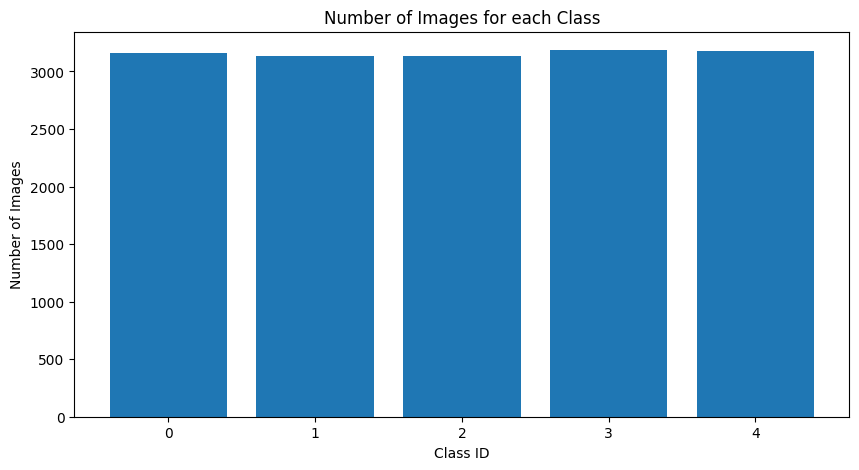

In [10]:
plt.figure(figsize=(10,5))
plt.bar(range(0,NumberOfClasses),NumberOfSamples)
plt.title("Number of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [11]:
def PreProcessing(img):
    # img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # img = cv2.equalizeHist(img)
    img = img/255 
    return img

In [12]:
img = PreProcessing(X_train[1500])
cv2.imshow("Image of X_train",img)
cv2.waitKey(0)

-1

In [13]:
X_train=np.array(list(map(PreProcessing,X_train)))
X_test=np.array(list(map(PreProcessing,X_test)))
X_validation=np.array(list(map(PreProcessing,X_validation)))

In [14]:
print(X_train.shape)

(15795, 128, 128, 3)


In [15]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
# X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [16]:
 print(X_train.shape)

(15795, 128, 128, 3)


In [17]:
# dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
# dataGen.fit(X_train)

In [18]:
print(Y_train)

[0 4 3 ... 3 1 3]


In [19]:
Y_train = to_categorical(Y_train,NumberOfClasses) 
Y_test = to_categorical(Y_test,NumberOfClasses) 
Y_validation = to_categorical(Y_validation,NumberOfClasses) 

In [20]:
print(Y_train)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [21]:
def myModel():
    NumberOfFilters1 = 32 
    NumberOfFilters2 = 64
    sizeOfFilter1=(5,5)
    sizeOfFilter2=(3,3)
    sizeOfPool=(2,2)
    NumberOfNode=128
    
    model = Sequential()
    model.add((Conv2D(NumberOfFilters1,sizeOfFilter2,input_shape=(imageDimension[0],imageDimension[1],3),activation='relu',padding='same')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.25))

    model.add((Conv2D(NumberOfFilters1,sizeOfFilter2,activation='relu',padding='same')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.25))
    
    model.add((Conv2D(NumberOfFilters2,sizeOfFilter2,activation='relu',padding='same')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.25))
    
    model.add((Conv2D(128,sizeOfFilter2,activation='relu',padding='same')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(NumberOfNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NumberOfClasses,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [22]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# print(es)

In [28]:
model = myModel()
print(model.summary())
# history = model.fit_generator(dataGen.flow(X_train,Y_train,batch_size=batchSizeVal),steps_per_epoch=len(classNumber)/batchSizeVal,epochs=epochsVal,validation_data=(X_validation,Y_validation),shuffle=1)
history = model.fit(X_train,Y_train,batch_size=batchSizeVal,epochs=epochsVal,validation_data=(X_validation,Y_validation),shuffle=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)       

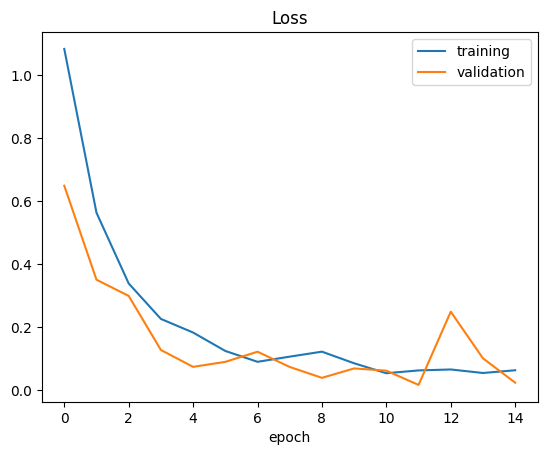

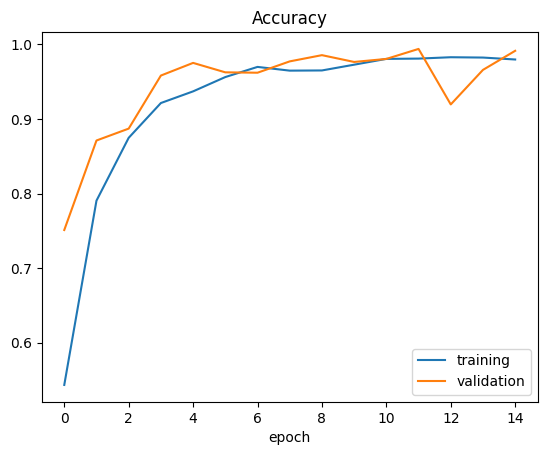

In [29]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [30]:
score= model.evaluate(X_test,Y_test,verbose=0)
print('Score Loss =',score[0])
print('Score Accuracy  = ',score[1])
print(score)



Score Loss = 0.027448307250919218
Score Accuracy  =  0.9918962717056274
[0.027448307250919218, 0.9918962717056274]


In [31]:
pickle_out=open("31_TestModelResize6","wb")
pickle.dump(model,pickle_out)
pickle_out.close()